We are importing Libraries which we will use in our project
Pandas :-which is used for data cleaning and analysis. Here, Pandas is the best tool for handling this real-world messy data.
Numpy : - NumPy aims to provide an array object that is up to 50x faster than traditional Python lists. It is very useful for fundamental scientific computations in Machine Learning

sklearn : -   sklearn library contains a lot of efficient tools for machine learning and statistical modeling including classification, regression, clustering and dimensionality reduction

In [ ]:
import pandas as pd
import numpy as np
 
from matplotlib import pyplot as plt
 
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
import pandas as pd
import seaborn as sns

We are importing pandas library and acessing dataset with help of pd.read_csv(path) functions from google drive .

In [ ]:
import pandas as pd
df = pd.read_csv("/content/drive/MyDrive/fake_job_postings.csv")

# **Will Take brief introduction of our dataset**

checking shape of dataset means how many rows and columns in our dataset

In [ ]:
df.shape

(17880, 18)

Using info() which helps us to tell the datatype of each column and tells us how much non-null values in each column

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17880 entries, 0 to 17879
Data columns (total 18 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   job_id               17880 non-null  int64 
 1   title                17880 non-null  object
 2   location             17534 non-null  object
 3   department           6333 non-null   object
 4   salary_range         2868 non-null   object
 5   company_profile      14572 non-null  object
 6   description          17879 non-null  object
 7   requirements         15185 non-null  object
 8   benefits             10670 non-null  object
 9   telecommuting        17880 non-null  int64 
 10  has_company_logo     17880 non-null  int64 
 11  has_questions        17880 non-null  int64 
 12  employment_type      14409 non-null  object
 13  required_experience  10830 non-null  object
 14  required_education   9775 non-null   object
 15  industry             12977 non-null  object
 16  func

by the help df.head() we can fetch first rows of dataset . By default it shows first 5 rows if you want to see first 10 rows then you will pass 10 value in its parameter .

In [ ]:
df.head()

,job_id,title,location,department,salary_range,company_profile,description,requirements,benefits,telecommuting,has_company_logo,has_questions,employment_type,required_experience,required_education,industry,function,fraudulent
0,1,Marketing Intern,"US, NY, New York",Marketing,NaN,"We're Food52, and we've created a groundbreaki...","Food52, a fast-growing, James Beard Award-winn...",Experience with content management systems a m...,NaN,0,1,0,Other,Internship,NaN,NaN,Marketing,0
1,2,Customer Service - Cloud Video Production,"NZ, , Auckland",Success,NaN,"90 Seconds, the worlds Cloud Video Production ...",Organised - Focused - Vibrant - Awesome!Do you...,What we expect from you:Your key responsibilit...,What you will get from usThrough being part of...,0,1,0,Full-time,Not Applicable,NaN,Marketing and Advertising,Customer Service,0
2,3,Commissioning Machinery Assistant (CMA),"US, IA, Wever",NaN,NaN,Valor Services provides Workforce Solutions th...,"Our client, located in Houston, is actively se...",Implement pre-commissioning and commissioning ...,NaN,0,1,0,NaN,NaN,NaN,NaN,NaN,0
3,4,Account Executive - Washington DC,"US, DC, Washington",Sales,NaN,Our passion for improving quality of life thro...,THE COMPANY: ESRI – Environmental Systems Rese...,"EDUCATION: Bachelor’s or Master’s in GIS, busi...",Our culture is anything but corporate—we have ...,0,1,0,Full-time,Mid-Senior level,Bachelor's Degree,Computer Software,Sales,0
4,5,Bill Review Manager,"US, FL, Fort Worth",NaN,NaN,SpotSource Solutions LLC is a Global Human Cap...,JOB TITLE: Itemization Review ManagerLOCATION:...,QUALIFICATIONS:RN license in the State of Texa...,Full Benefits Offered,0,1,1,Full-time,Mid-Senior level,Bachelor's Degree,Hospital & Health Care,Health Care Provider,0


we are checking the columns names of our dataset

In [ ]:
df.columns

Index(['job_id', 'title', 'location', 'department', 'salary_range',
       'company_profile', 'description', 'requirements', 'benefits',
       'telecommuting', 'has_company_logo', 'has_questions', 'employment_type',
       'required_experience', 'required_education', 'industry', 'function',
       'fraudulent'],
      dtype='object')

Dropping the job_id column by drop()

In [ ]:
df.drop('job_id',axis=1,inplace=True)

checking how many salary_range column contains null values 

In [ ]:
df.salary_range.isnull().sum()

15012

checking duplicated values in our dataset if we find duplicated values then we will take only time that row instead of taking all rows

In [ ]:
df.duplicated().sum()

281

Setting up the size of graph in our project . Now figure of every graph will be (12,6) .

In [ ]:
# Default figure size for EDA
from matplotlib.pylab import rcParams
rcParams["figure.figsize"] = (12, 6)

want to know how many percentage of null values ,unique values , datatype etc. of each column of our dataset

In [ ]:
statistics_of_data = []
data = df.copy()
for col in data.columns:
  statistics_of_data.append((col,
                             data[col].nunique(),
                             data[col].isnull().sum()*100/data.shape[0],
                             data[col].value_counts(normalize=True, dropna=False).values[0] * 100, 
                             data[col].dtype
                             ))
stats_df = pd.DataFrame(statistics_of_data, columns=['Feature', 'Uniq_val', 'missing_val', 'val_biggest_cat', 'type'])

In [ ]:
df.title.value_counts(dropna=False) 

English Teacher Abroad                                         311
Customer Service Associate                                     146
Graduates: English Teacher Abroad (Conversational)             144
English Teacher Abroad                                          95
Software Engineer                                               86
                                                              ... 
West Coast Regional Channel Manager (RCM)                        1
BI Practice Manager                                              1
Community Coordinator- Ambassador Programme                      1
Senior Traffic Engineer                                          1
Project Cost Control Staff Engineer - Cost Control Exp - TX      1
Name: title, Length: 11231, dtype: int64

In [ ]:
stats_df

,Feature,Uniq_val,missing_val,val_biggest_cat,type
0,title,11231,0.000000,1.739374,object
1,location,3105,1.935123,4.015660,object
2,department,1337,64.580537,64.580537,object
3,salary_range,874,83.959732,83.959732,object
4,company_profile,1709,18.501119,18.501119,object
5,description,14801,0.005593,2.119687,object
6,requirements,11968,15.072707,15.072707,object
7,benefits,6205,40.324385,40.324385,object
8,telecommuting,2,0.000000,95.710291,int64
9,has_company_logo,2,0.000000,79.530201,int64


# **Visualization Phase**

Plotting Graphs

Total unique values are:  2 


Category	Value

0    17014
1      866
Name: fraudulent, dtype: int64


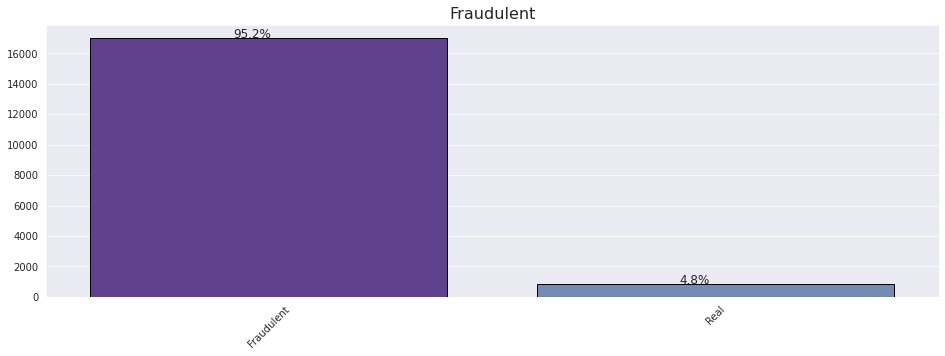

In [ ]:
# Percentage on bar
def per_on_bar(feature, title="",xlabel=[0,1], limited=False, n=10, pallete="twilight_shifted"):
    print("Total unique values are: ", len(feature.value_counts()), "\n\n")
    print("Category\tValue\n")
    if limited:
        data = feature.value_counts()[0:n]
    else:
        data = feature.value_counts()
    print(data)
    categories_num = len(data)
    #plotting bar-plot and pie chart
    sns.set_style('darkgrid')
    plt.figure(figsize=(16,5))
    plt.title(title, fontsize=16)
    plt.xticks(rotation=45)
    plot = sns.barplot(x=xlabel, y=data.values, edgecolor="black", palette=sns.palettes.color_palette(pallete))
    total = len(feature)
    for p in plot.patches:
        percentage = '{:.1f}%'.format(100 * p.get_height()/total)
        x = p.get_x() + p.get_width() / 2 - 0.08
        y = p.get_y() + p.get_height()
        plot.annotate(percentage, (x, y), size = 12)
    plt.show()
# ax = sns.countplot(x=df.fraudulent)
# per_on_bar(ax, df.fraudulent)
per_on_bar(df.fraudulent, "Fraudulent",['Real',"Fraudulent"])



In [ ]:
dict(df.fraudulent.value_counts()).keys()

dict_keys([0, 1])

In [ ]:
df[df['telecommuting']==0][['fraudulent',"telecommuting"]]

,fraudulent,telecommuting
0,0,0
1,0,0
2,0,0
3,0,0
4,0,0
...,...,...
17875,0,0
17876,0,0
17877,0,0
17878,0,0


In [ ]:
per_on_bar(df.has_company_logo, "has_company_logo",["0","1"])
# #

In [ ]:
per_on_bar(df.telecommuting	, "telecommuting",["0","1"])


we are filling null values with null string because we want to visualize some graph . Its very important to remove null values because graph can't be plot with null values

In [ ]:
df1 = df.fillna(value='null')

In [ ]:
print("Null values ",df.isnull().sum().sum())
print("After filling with null",
df1.isnull().sum().sum() )


Null values  70103
After filling with null 0


Making a exploreFeatures function which will give us the info about the most occured category of column with weightage.

In [ ]:
def exploreFeatures(col):
  top_n=10
  top_n = top_n if df1[col].nunique() > top_n else df1[col].nunique()
  print(f"{col} has {df1[col].nunique()} unique values, 5 most occured vaues and their type: {df1[col].dtype}.")
  print(df1[col].value_counts(normalize=True, dropna=False).head())

In [ ]:
exploreFeatures('title')

title has 11231 unique values, 5 most occured vaues and their type: object.
English Teacher Abroad                                0.017394
Customer Service Associate                            0.008166
Graduates: English Teacher Abroad (Conversational)    0.008054
English Teacher Abroad                                0.005313
Software Engineer                                     0.004810
Name: title, dtype: float64


In [ ]:
# exploreFeatures('department')

**fraudlent vs Employment Type** *italicized text*

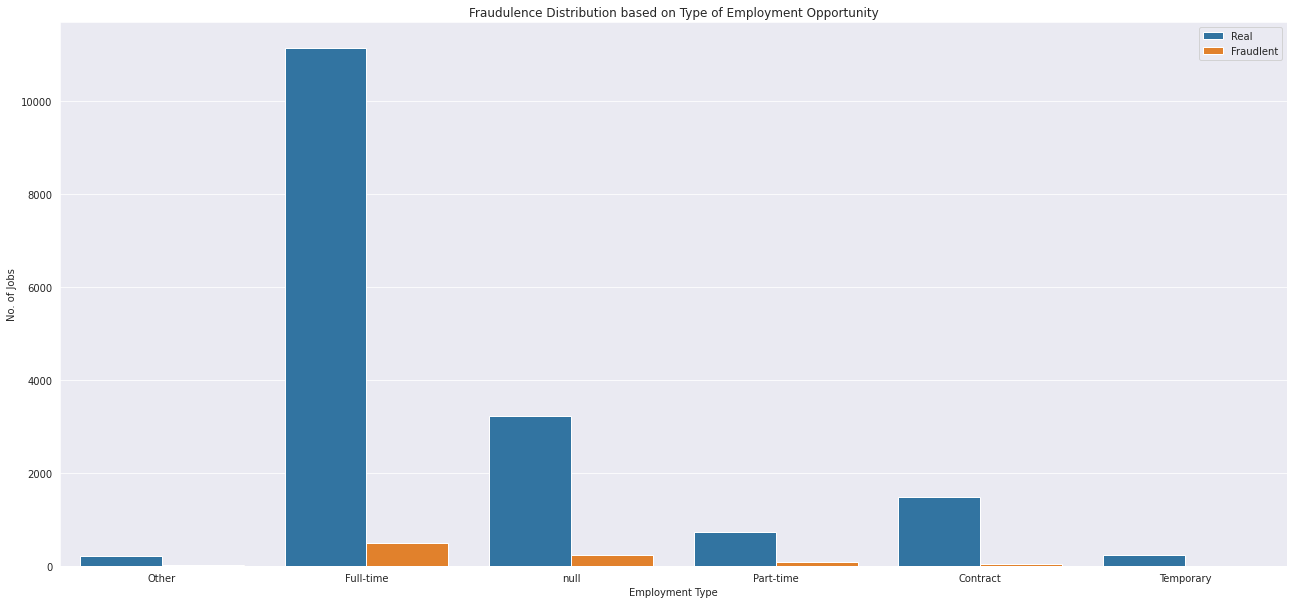

In [ ]:

sns.set_style('darkgrid')
plt.figure(1,figsize=(22,10))
sns.countplot(hue=df1.fraudulent ,x=df1.employment_type)
plt.title('Fraudulence Distribution based on Type of Employment Opportunity')
plt.xlabel('Employment Type')
plt.ylabel('No. of Jobs')
plt.legend(labels=['Real',"Fraudlent"],loc='upper right')
plt.show()

In [ ]:
sns.countplot(x="telecommuting",hue="fraudulent",data=df1);

In [ ]:

fig = plt.figure(figsize=(8,6))
df1.groupby('required_education').fraudulent.count().plot.bar(ylim=0)
plt.show()

its a general rule to remove that column which contains more than 20% null values . That's for it dropping  columns which has more than 20% null values.

In [ ]:
columns= stats_df[stats_df['missing_val']>20]['Feature'].values
columns

array(['department', 'salary_range', 'benefits', 'required_experience',
       'required_education', 'industry', 'function'], dtype=object)

In [ ]:
df.drop(columns,axis=1,inplace=True)

In [ ]:
# df.head()

describe() gives us the information only of int/float datatypes columns . it provides us min , max , count and 25,50,75 percentile as well std  about column

In [ ]:
df.describe().T

In [ ]:
df.location.value_counts()

location column contains  3 things . Country Name , Short Abbreviation and City Name . We are interested in  only country name which is at first position . We are splitting the string and taking country name .

In [ ]:
def code(string):
  return string.split(",")[0]

In [ ]:
df['location'].iloc[0]

'US, NY, New York'

Replacing null values with empty string by the help replace() using numpy library .

In [ ]:
df = df.replace(np.nan,"")

Objective of code function has described above . We are taking a new column named country and storing country name by the help of code() .

In [ ]:
df['country'] = df["location"].apply(code)

After storing country name in Country column then we don't need to use location column . That's for it dropping this column . 

In [ ]:
df.drop('location',axis=1,inplace=True)

Country column contains many countries  but we are  interested in only those 5 countries who is most frequent . 

In [ ]:
p=df.groupby("country")["country"].count().sort_values(ascending=False)
most_frequent_country = dict(p[:5]).keys()

In [ ]:
most_frequent_country

dict_keys(['US', 'GB', 'GR', 'CA', 'DE'])

In [ ]:
df.isnull().sum().sum()

0

In [ ]:
df.shape

(17880, 10)

Fetching only those rows who are of most frequent countries.

In [ ]:
data = df.copy()
print(data.shape)
data = data[data['country'].isin(most_frequent_country)]
print(data.shape)


(17880, 10)
(14820, 10)


We have to work only those columns whose datatypes is object.

In [ ]:
data = data.select_dtypes(include='object')

In [ ]:
data.shape

(14820, 6)

In [ ]:
data.iloc[0]

title                                               Marketing Intern
company_profile    We're Food52, and we've created a groundbreaki...
description        Food52, a fast-growing, James Beard Award-winn...
requirements       Experience with content management systems a m...
employment_type                                                Other
country                                                           US
Name: 0, dtype: object

Dropping here country column because we have taken data of most frequent country as well dropping employment_type column .

In [ ]:
data.drop(['country','employment_type'],axis=1,inplace=True)

In [ ]:
data.shape

(14820, 4)

We have taken only object datatype columns . Now we have to merge all columns in separate column whose name will be Text .

In [ ]:
data['Text']=""

In [ ]:
data.columns

Index(['title', 'company_profile', 'description', 'requirements', 'Text'], dtype='object')

Merging the data of all columns in Text column so that we can do preprocessing easily .

In [ ]:
for col in data.columns[:-1]:
    data["Text"]=data["Text"]+" "+data[col]

In [ ]:
data['Text'].iloc[0]

" Marketing Intern We're Food52, and we've created a groundbreaking and award-winning cooking site. We support, connect, and celebrate home cooks, and give them everything they need in one place.We have a top editorial, business, and engineering team. We're focused on using technology to find new and better ways to connect people around their specific food interests, and to offer them superb, highly curated information about food and cooking. We attract the most talented home cooks and contributors in the country; we also publish well-known professionals like Mario Batali, Gwyneth Paltrow, and Danny Meyer. And we have partnerships with Whole Foods Market and Random House.Food52 has been named the best food website by the James Beard Foundation and IACP, and has been featured in the New York Times, NPR, Pando Daily, TechCrunch, and on the Today Show.We're located in Chelsea, in New York City. Food52, a fast-growing, James Beard Award-winning online food community and crowd-sourced and c

Importing libraries for working on Text column because we have to remove stop words , punctuation etc.

In [ ]:
from nltk.corpus import stopwords
from nltk.stem import SnowballStemmer
from nltk.tokenize import word_tokenize
import re
import nltk
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

In [ ]:
# stop=set(stopwords.words("English"))
from nltk.corpus import stopwords

stop= stopwords.words('english')

*** Cleaning Data***

In [ ]:
def cleaning_data(text):
    text=text.lower()
    obj=re.compile(r"<.*?>")                     #removing html tags
    text=obj.sub(r" ",text)
    obj=re.compile(r"https://\S+|http://\S+")    #removing url
    text=obj.sub(r" ",text)
    obj=re.compile(r"[^\w\s]")                   #removing punctuations
    text=obj.sub(r" ",text)
    obj=re.compile(r"\d{1,}")                    #removing digits
    text=obj.sub(r" ",text)
    obj=re.compile(r"_+")                        #removing underscore
    text=obj.sub(r" ",text)
    obj=re.compile(r"\s\w\s")                    #removing single character
    text=obj.sub(r" ",text)
    obj=re.compile(r"\s{2,}")                    #removing multiple spaces
    text=obj.sub(r" ",text)
   
    
    stemmer = SnowballStemmer("english")
    text=[stemmer.stem(word) for word in text.split() if word not in stop]
    
    return " ".join(text)
data["Text"]=data["Text"].apply(cleaning_data)
data["Text"].iloc[0]

'market intern food creat groundbreak award win cook site support connect celebr home cook give everyth need one place top editori busi engin team focus use technolog find new better way connect peopl around specif food interest offer superb high curat inform food cook attract talent home cook contributor countri also publish well known profession like mario batali gwyneth paltrow danni meyer partnership whole food market random hous food name best food websit jame beard foundat iacp featur new york time npr pando daili techcrunch today show locat chelsea new york citi food fast grow jame beard award win onlin food communiti crowd sourc curat recip hub current interview full part time unpaid intern work small team editor execut develop new york citi headquart reproduc repackag exist food content number partner site huffington post yahoo buzzfe various content manag systemsresearch blog websit provis food affili programassist day day affili program support screen affili assist affili in

In [ ]:
from wordcloud import WordCloud,STOPWORDS
from collections import defaultdict
from nltk import ngrams

Visualizing the most frequent words in real and fake posts

In [ ]:
def generate(text,ngram):
    n_grams=ngrams(word_tokenize(text),ngram)
    grams=[" ".join(val) for val in n_grams]
    return grams

In [ ]:
data['Fraudulent'] = df['fraudulent']

In [ ]:
real_post=data[data["Fraudulent"]==1]["Text"].values

(-0.5, 799.5, 799.5, -0.5)

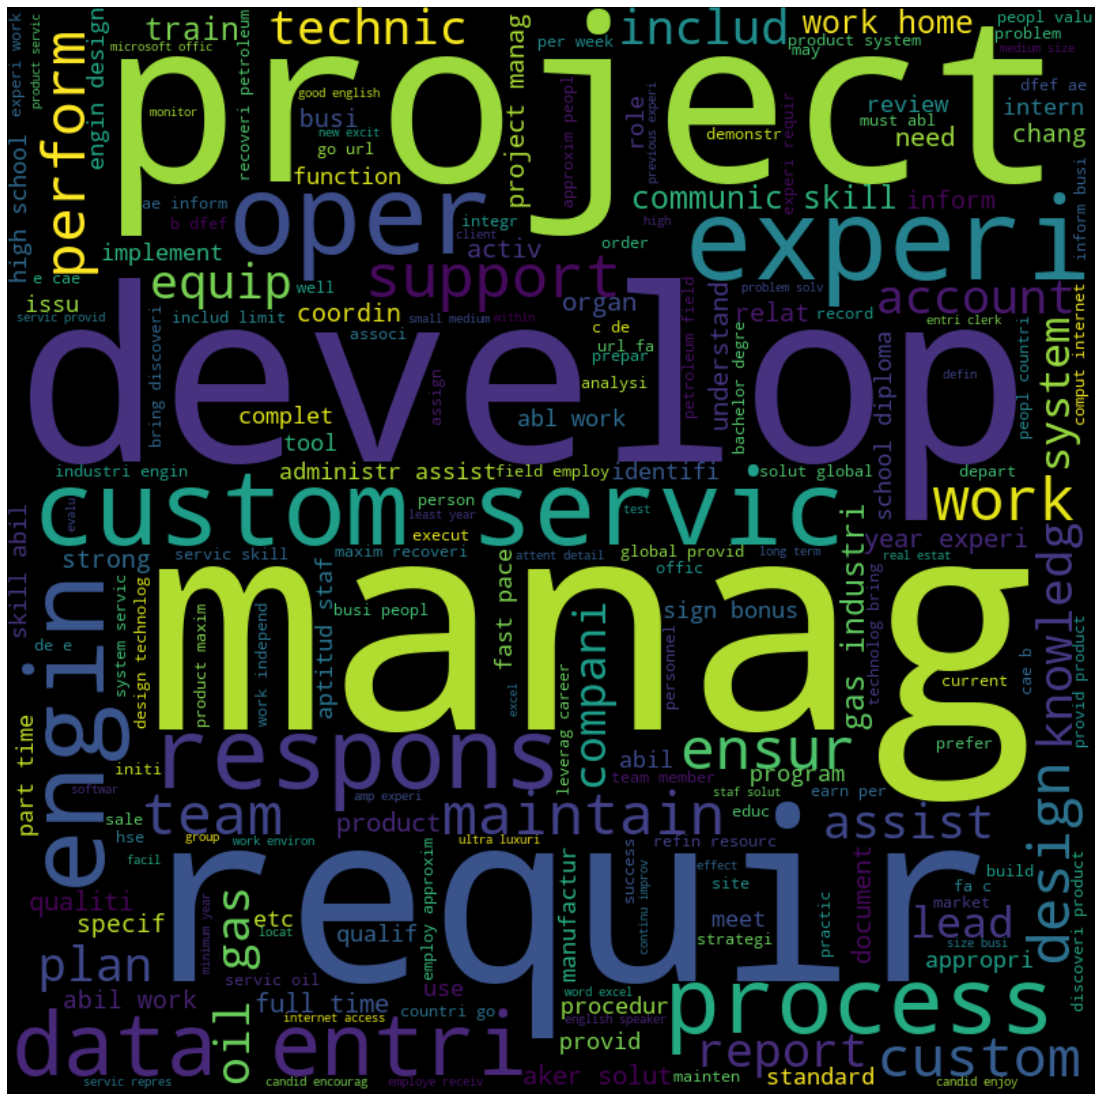

In [ ]:
wordcloud = WordCloud(width = 800, height = 800,
                background_color ='black',
                stopwords = STOPWORDS).generate(str(real_post))

fig = plt.figure(figsize = (30,20))
plt.imshow(wordcloud, interpolation = 'bilinear')
plt.axis('off')

In [ ]:
fake_post=data[data["Fraudulent"]==0]["Text"].values

(-0.5, 799.5, 799.5, -0.5)

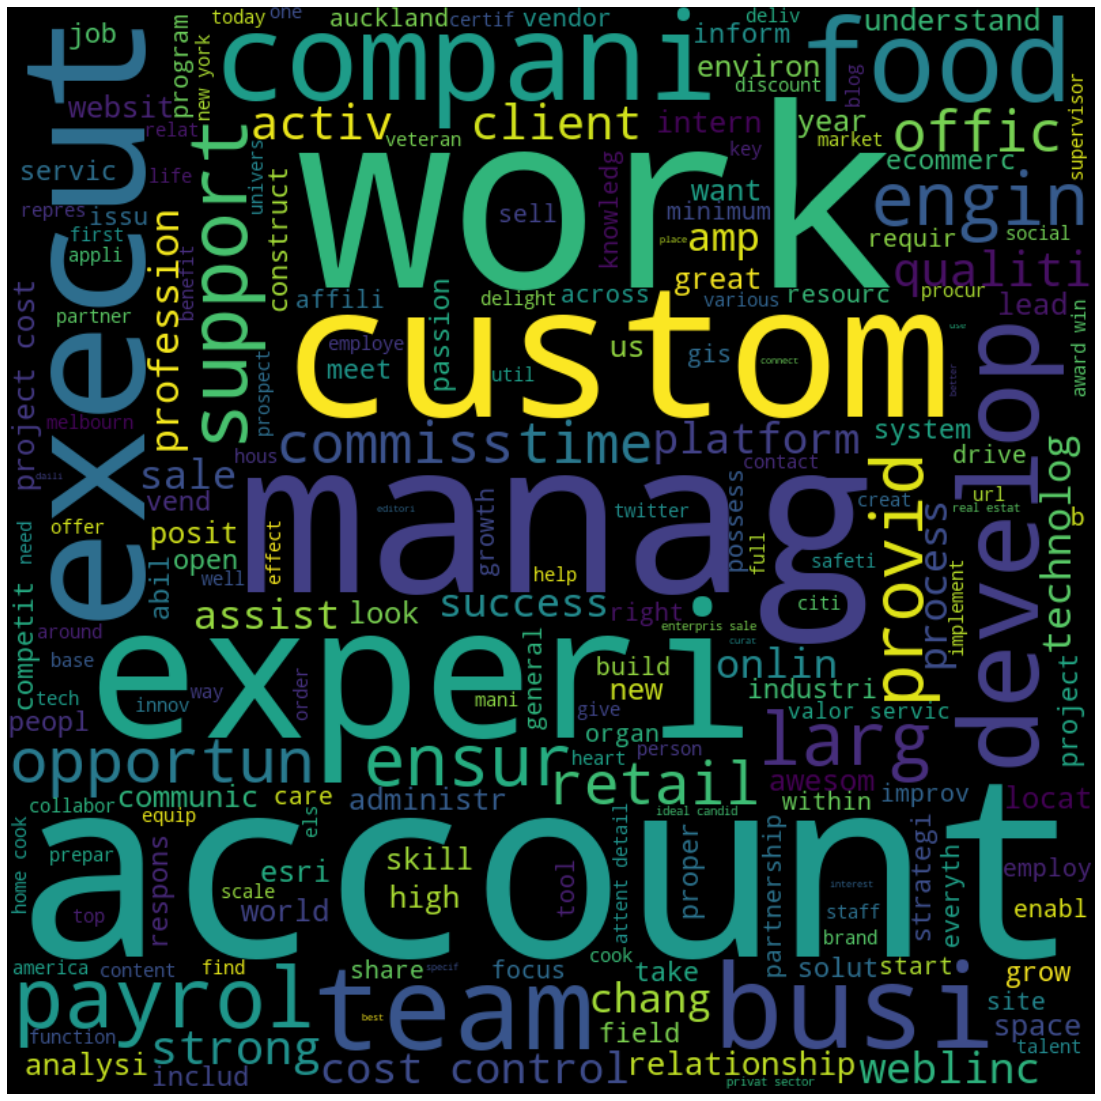

In [ ]:
wordcloud = WordCloud(width = 800, height = 800,
                background_color ='black',
                stopwords = STOPWORDS).generate(str(fake_post))

fig = plt.figure(figsize = (30,20))
plt.imshow(wordcloud, interpolation = 'bilinear')
plt.axis('off')

In [ ]:
df_Final = data[['Text','Fraudulent']]

In [ ]:
df_Final

,Text,Fraudulent
0,market intern food creat groundbreak award win...,0
2,commiss machineri assist cma valor servic prov...,0
3,account execut washington dc passion improv qu...,0
4,bill review manag spotsourc solut llc global h...,0
5,account clerk job overviewapex environment con...,0
...,...,...
17873,recruit coordin respons facilit recruit hire p...,0
17874,javascript develop sr javascript develop exper...,0
17875,account director distribut vend look awesom ne...,0
17876,payrol account weblinc commerc platform servic...,0


***Wow. our data is ready . ***

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer

Now its time to convert Text data into int because as we know , every model work on int datatype . There are many techniques to convert text into int like BOW , TFIDF etc. We will use TFIDF for converting Text into int . We will take only 12k columns after converting text into int.

In [ ]:
vectorizer=TfidfVectorizer(strip_accents='unicode',
                           analyzer='word',
                           ngram_range=(1, 2),
                           max_features=12000,
                           smooth_idf=True,
                           sublinear_tf=True)

vectorizer.fit(df_Final["Text"])
X = vectorizer.transform(df_Final["Text"])

Now we have 12k columns but we are interested in taking only those columns which has more wieightage and can assist us to get a good model .
By the help of PCA , we are taking 90% important columns out of 12k .

In [ ]:
from sklearn.decomposition import PCA
pca = PCA(n_components=0.90)

X = pca.fit_transform(X.toarray())

Dataset is ready to split into training and testing phase 

In [ ]:
y=df_Final["Fraudulent"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=42)

***Applying Random Forest Classifier.***

In [ ]:
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier()

rf.fit(X_train,y_train)
# training
y_pred = rf.predict(X_test)

 

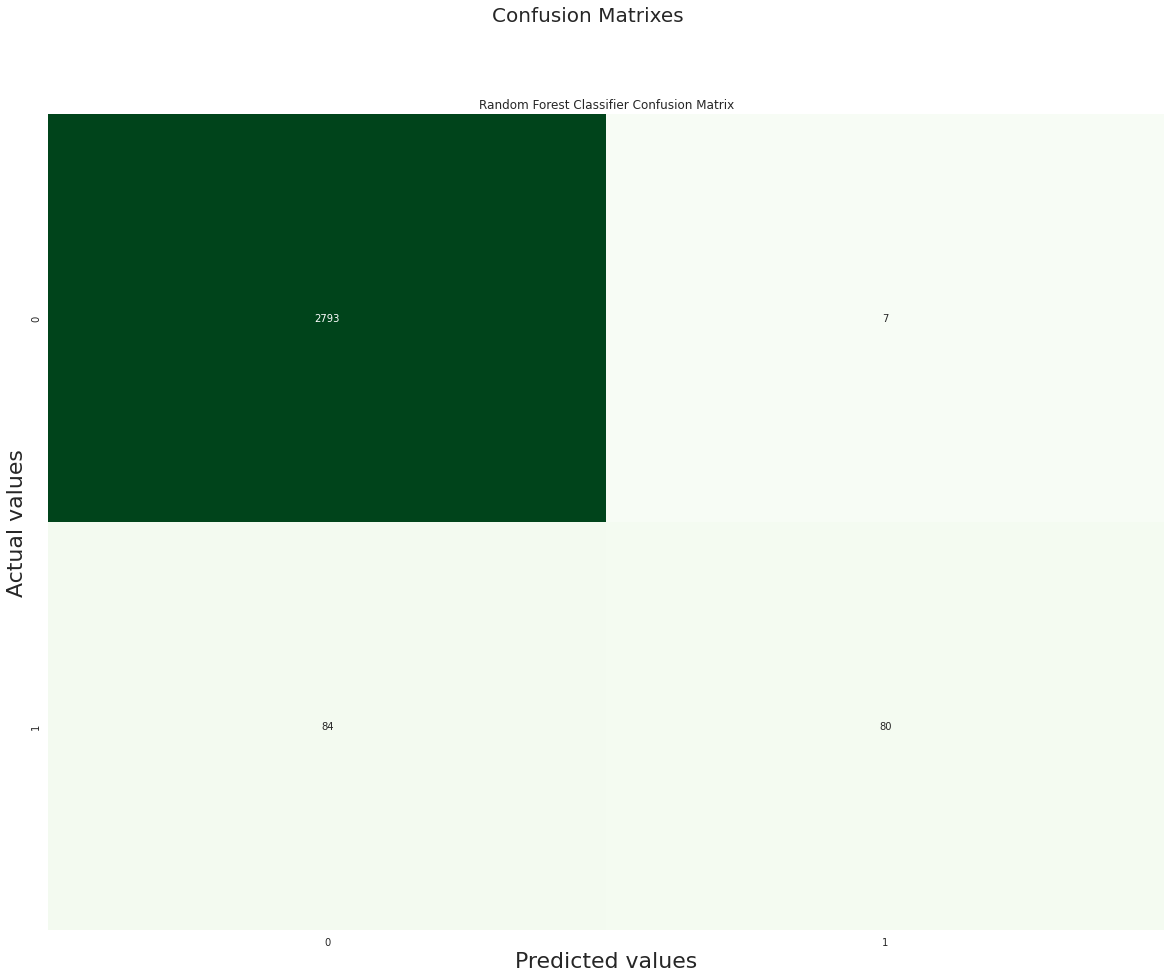

In [ ]:
from sklearn.metrics import confusion_matrix

cm_lr = confusion_matrix(y_test,y_pred)

plt.figure(figsize=(20,15))
plt.suptitle("Confusion Matrixes",fontsize=20)
plt.title("Random Forest Classifier Confusion Matrix")

sns.heatmap(cm_lr,cbar=False,annot=True,cmap="Greens",fmt="d")
plt.xlabel("Predicted values",fontsize=22)
plt.ylabel("Actual values",fontsize=22)
plt.show()


WoW ,  its accuracy is around is 96.7% which is fabulous .

In [ ]:
from sklearn.metrics import accuracy_score,confusion_matrix
accuracy_score(y_test,y_pred)

0.9665991902834008

***Applying Xgboost Classifier***

In [ ]:
from xgboost import XGBClassifier

Its accuracy is also awesome which is 96.9% .

In [ ]:
xgb = XGBClassifier(n_estimators=100)
 

xgb.fit(X_train,y_train)
y_pred = xgb.predict(X_test)
accuracy_score(y_test,y_pred)


0.9692982456140351

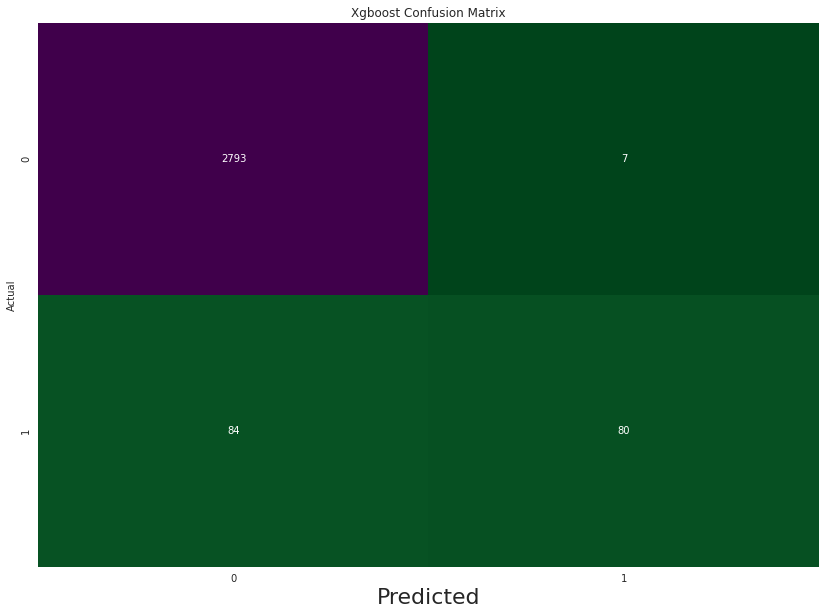

In [ ]:
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot  as plt
cm_lr = confusion_matrix(y_test,y_pred)
plt.figure(figsize=(14,10))
 
plt.title("Xgboost Confusion Matrix")
 
sns.heatmap(cm_lr,cbar=False,annot=True,cmap="PRGn_r",fmt="d", xticklabels=True, yticklabels=True)
plt.xlabel('Predicted',fontsize=22)
plt.ylabel('Actual',fontsize=22)
plt.show();


  

***Conlcusion :-***

Xgboost is little bit good comparing RandomForestClassifier.

# *Bundle of Thanks Tevera for choosing . Glad to work with you . Again thank you so much for cooperating with me . Hopefully you also have enjoyed working with me . Please feel free to knock me whenever you need any type of help regarding this project or any other project as well in other subjects like cyber security , Robotics etc. Thank You 🧡*